In [64]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Rescaling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling, Conv2D, MaxPooling2D, Flatten, Dense
from IPython.display import Image
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import load_img
from PIL import Image
from IPython.display import display

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
import pathlib
path = "drive/MyDrive/Upgrade Skill/GLUCARE/DATASET"
data_dir = pathlib.Path(path)

In [67]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

130


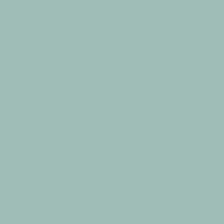

In [68]:
Cek = list(data_dir.glob('NEGATIVE/*'))
img = Image.open(str(Cek[0]))
new_img = img.resize((224, 224))
display(new_img)

In [69]:
batch_size = 15
img_height = 50
img_width = 50
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset="training",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset="validation",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)

Found 130 files belonging to 5 classes.
Using 104 files for training.
Found 130 files belonging to 5 classes.
Using 26 files for validation.


In [70]:
class_names = train_ds.class_names
print(class_names)

['DIABETES+', 'DIABETES++', 'DIABETES+++', 'NEGATIVE', 'PRE-DIABETES']


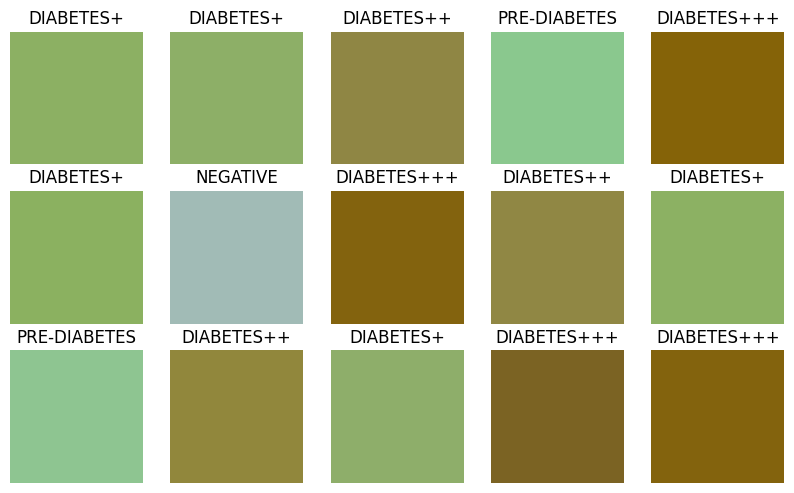

In [71]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(len(images)):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [72]:
normalization_layer = Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.5254902 0.7960785


In [73]:
num_classes = 5
model = Sequential([Rescaling(1./255, input_shape=(img_height, img_width, 3)),
layers.Conv2D(16, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(32, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(64, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(num_classes)])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [74]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)              │ (None, 50, 50, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 50, 50, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 25, 25, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 25, 25, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 319,269 (1.22 MB)

 Trainable params: 319,269 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [76]:
epochs=25
history = model.fit(train_ds,
validation_data=val_ds,
epochs=epochs)

Epoch 1/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 369ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 2/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 220ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 3/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 222ms/step - accuracy: 1.0000 - loss: 9.6381e-04 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 4/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 228ms/step - accuracy: 1.0000 - loss: 9.4390e-04 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 5/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 363ms/step - accuracy: 1.0000 - loss: 7.8017e-04 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 6/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 364ms/step - accuracy: 1.0000 - loss: 8.5326e-04 - val_accuracy: 1.0000 - val_loss: 9.4169e-04
Epoch 7/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 215ms/step - accuracy: 1.0000 - loss: 7.5381e-04 - val_accuracy: 1.0000 - val_loss: 8.7785e-04
Epoch 8/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 219ms/step - accuracy: 1.0000 - loss: 5.8855e-04 - 

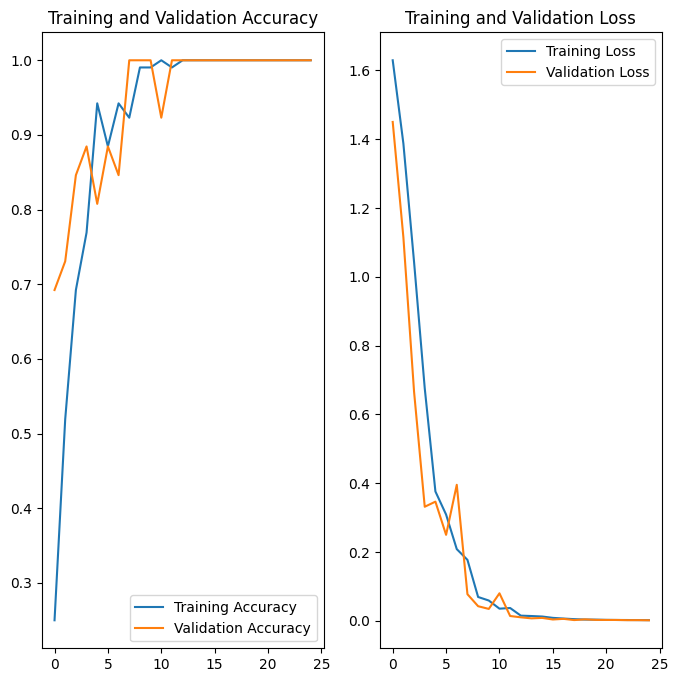

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


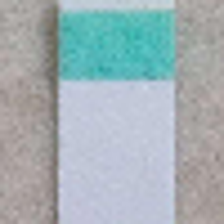

Striptest anda terklasifikasi sebagai NEGATIVE dengan tingkat akurasi 99.95 persen.


In [63]:
path = "drive/MyDrive/Upgrade Skill/GLUCARE/DATATEST/5.jpg"
img = load_img(path, target_size=(img_height, img_width))
img_array = img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
resized_img = img.resize((224, 224))
display(resized_img)
print(
"Striptest anda terklasifikasi sebagai {} dengan tingkat akurasi {:.2f} persen."
.format(class_names[np.argmax(score)],100 * np.max(score)))